
make_blobs 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다.\
이 때 등방성이라는 말은 모든 방향으로 같은 성질을 가진다는 뜻이다.\
make_blobs는 보통 클러스링용 가상데이터를 생성하는데 사용한다.\
make_blobs 함수의 인수와 반환값은 다음과 같다.

인수:

n_samples : 표본 데이터의 수, 디폴트 100\
n_features : 독립 변수의 수, 디폴트 20\
centers : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3\
cluster_std: 클러스터의 표준 편차, 디폴트 1.0\
center_box: 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0))

반환값:

X : [n_samples, n_features] 크기의 배열\
독립 변수\
y : [n_samples] 크기의 배열\
종속 변수

[0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1
 0 0 0 1 1 0 1 0 1 1 1 1 0]


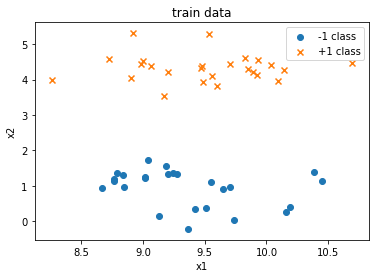

In [4]:
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 50, centers = 2, cluster_std = 0.5, random_state = 4)
print(y)
y = 2 * y - 1 # 0, 1인 데이터들을 -1, 1로 바꿔줌

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label = "-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label = "+1 class")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("train data")
plt.show()

In [6]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C=1e10).fit(X, y)

n_support_: 각 클래스의 서포트의 개수

support_: 각 클래스의 서포트의 인덱스

support_vectors_: 각 클래스의 서포트의x 값 . x+ 와 x-


coef_: w 벡터

intercept_: w0

dual_coef_: 각 원소가 ai yi 로 이루어진 벡터

In [7]:
model.n_support_

array([1, 1])

In [8]:
model.support_

array([42,  1])

In [9]:
model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [10]:
y[model.support_]

array([-1,  1])

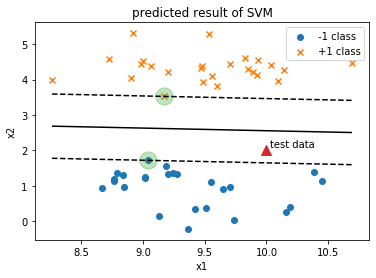

In [14]:
import numpy as np
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker = 'o', label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker = 'x', label="+1 class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "test data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("predicted result of SVM")
plt.show()

In [15]:
x_new1 = [10, 1]
model.decision_function([x_new1])

array([-1.71192987])

In [16]:
x_new2 = [10, 2]
model.decision_function([x_new2])

array([-0.61101582])

In [17]:
x_new3 = [10, 3]
model.decision_function([x_new3])

array([0.48989822])